<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; In this Kaggle document we will handle the below strategies:
</div>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#load-dataset">☑ Load Data from <code>BoTnet 5% sample dataset</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#exploratory-data-analysis">☑ Exploratory data <code>analysis</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#default-features">☑ A baseline analysis for the dataset using all <code>default features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#specific-features">☑ A baseline analysis for the dataset using <code>specific features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-windowing-default">☑ A baseline analysis for the dataset using <code>time-windowing</code> and <code>default features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-windowing-spectral">☑ A baseline analysis for the dataset using <code>time-windowing</code> and <code>spectral metrics features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-series-scanservice">☑ Timeseries analysis over <code>Service-Scan</code> attack 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-series-scanservice-balanced">☑ Timeseries analysis over  <code>Service-Scan</code> attack with <code>Balancing</code> 😃</a></p></blockquote>

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="load-dataset"></a>
    📌 First: Load Data
</div>


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📁 Datasets directory
</div>


In [1]:
verbose = True
very_verbose = False
eval_ML = True
eval_community = False
eval_spectral = False
eval_all = False

import os
for dirname, _, filenames in os.walk('/kaggle/input/train-test-dataset-bot-iot'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train-test-dataset-bot-iot/Train_Test_datasets_bot/UNSW_2018_IoT_Botnet.csv


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    ⚙️ Working directory
</div>


In [2]:
print("working directory:") 
!pwd

working directory:
/kaggle/working


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🗃️ From dataset to dataframe
</div>


In [3]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

df_original_data = pd.read_csv("/kaggle/input/train-test-dataset-bot-iot/Train_Test_datasets_bot/UNSW_2018_IoT_Botnet.csv")
if verbose:
    print(df_original_data.shape)

(668500, 46)


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="exploratory-data-analysis"></a>
    📌 Second: Exploratory Data Analysis 
</div>

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔨 Dataframe structure
</div>


In [4]:
if verbose :
    print(list(df_original_data.columns))
if very_verbose :
    print(df_original_data.dtypes)

['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Decompose attack labels from categories
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: attack categories must be initiated according to dataset features.
</div>

In [5]:
binary_label = 'attack'
attack_cat_label = 'category'
attack_label = 'subcategory'

binary_label_count = df_original_data[binary_label].value_counts()
attack_cat_label_count = df_original_data[attack_cat_label].value_counts()
attack_label_count = df_original_data[attack_label].value_counts()

attacks = df_original_data[binary_label].unique()
categories = df_original_data[attack_cat_label].unique()
subcategories = df_original_data[attack_label].unique()

if verbose :
    print(attacks)
    print(categories)
    print(subcategories)

[1 0]
['DDoS' 'Normal' 'Reconnaissance' 'Theft']
['UDP' 'Normal' 'OS_Fingerprint' 'Service_Scan' 'Data_Exfiltration'
 'Keylogging']


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📊 Attack information 
</div>


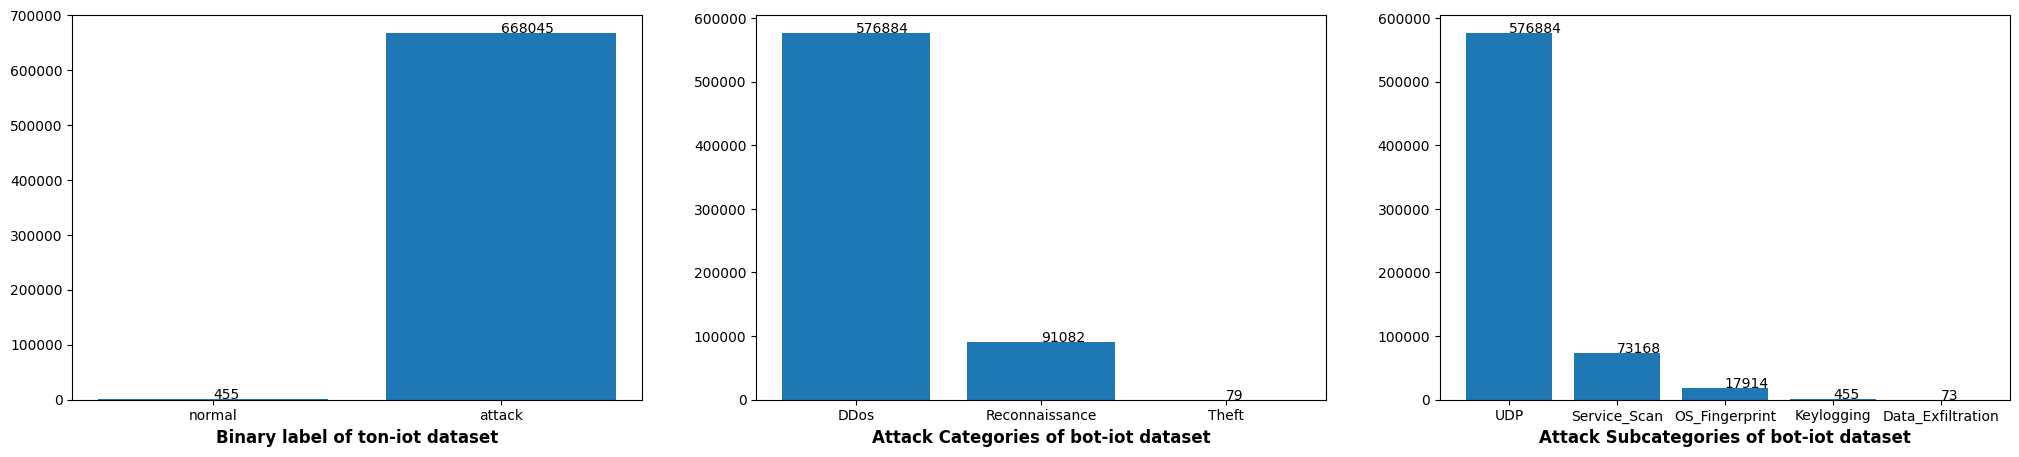

In [6]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
plt.figure(figsize=(25, 5))

#plot binary label
axs = plt.subplot(1, 3, 1)
x = ['normal','attack']
y = [binary_label_count[0],binary_label_count[1]]
plt.bar(x, y)
plt.xlabel('Binary label of ton-iot dataset', fontweight='bold', color = 'black',
           fontsize='12', horizontalalignment='center')
addlabels(x, y)


#plot attack categories
axs = plt.subplot(1, 3, 2)
x = ['DDos','Reconnaissance','Theft']
y = [attack_cat_label_count[0],attack_cat_label_count[1],attack_cat_label_count[3]]
plt.bar(x,y)
plt.xlabel('Attack Categories of bot-iot dataset', fontweight='bold',
           color = 'black',
           fontsize='12', horizontalalignment='center')
addlabels(x, y)

#plot attack categories
axs = plt.subplot(1, 3, 3)
x = ['UDP','Service_Scan','OS_Fingerprint','Keylogging','Data_Exfiltration']
y = [attack_label_count[0],attack_label_count[1],attack_label_count[2],attack_label_count[3],attack_label_count[4]]
plt.bar(x,y)
plt.xlabel('Attack Subcategories of bot-iot dataset', fontweight='bold',
           color = 'black',
           fontsize='12', horizontalalignment='center')
addlabels(x, y)

plt.show()

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔵➖😈➖🔵 Visualize interactions (graphs)
</div>


In [7]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import igraph as ig

def extract_graph(dataset, graph_type, label, src_addr, daddr, sport=0, dst_port=0, smac=0, dst_mac=0):

    """ Extract the graph attack according to the type we need to show

        Parameters
        ----------
        dataset: dataset, graph_type: type of graph we need to show (ip, ip + proto, or ip + mac),
        label: label of the attack, src_addr: source ip, daddr: destination ip, sport: source port,
        dst_port: destination port, smac: source mac, dst_mac: destination mac

        Returns
        -------
        graph of nodes and edges , attack_list for the type of attack found on the edge between two nodes (ip sources) ,
         attack_labels for the label of the attacks in the dataset
        """

    format_supported = True
    if graph_type == 'ip':
        dataset['source_node'] = dataset[src_addr]
        dataset['dst_node'] = dataset[daddr]
    else:
        if graph_type == 'ip_proto':
            comp_field1 = sport
            comp_field2 = dst_port
        elif graph_type == 'mac':
            comp_field1 = smac
            comp_field2 = dst_mac
        else:
            format_supported = False
        if format_supported:
            dataset['source_node'] = dataset[src_addr] + ':' + dataset[comp_field1].astype(str)
            dataset['dst_node'] = dataset[daddr] + ':' + dataset[comp_field2].astype(str)
        else:
            print('Graph type not supported :' + graph_type)

    dataset['edge'] = dataset['source_node'] + ':' + dataset['dst_node']
    dataset['edge_label'] = dataset[sport].astype(str) + ':' + dataset[dst_port].astype(str) + ':' + dataset[label].astype(str)
    graph = nx.Graph()
    # pos = nx.layout.spring_layout(graph)
    sip_list = dataset['source_node']
    dip_list = dataset['dst_node']
    ip_list = [*sip_list, *dip_list]

    graph.add_nodes_from(ip_list)
    attack_labels = dataset[label]
    edge_label_list = dataset['edge_label']

    attack_list = []

    for u, v, d in zip(sip_list, dip_list, edge_label_list):
        # graph.add_edge(u, v, label=d)
        label = d.split(':')[2]
        colors = {
            0: 'blue',
            1: 'red',
        }
        color = colors[int(label[0])]
        graph.add_edge(u, v, label=d, color=color)

    for k, v, d in graph.edges(data=True):
        attack_list.append(d['label'].split(':')[2])

    return graph, attack_list, attack_labels

def show_graph(graph):

    """ Show the graph we extracted as nodes and edges in networkx

        Parameters
        ----------
        graph : graph with nodes and edges

        Returns
        -------
        display a graph with nodes and edges using networkx
        """
    

    if(graph.number_of_nodes() > 3000):
        sampled_edges = random.sample(graph.eg, 3000)
        sampled_graph = graph.subgraph(sampled_nodes)
        plt.figure(figsize=(200, 80))
        pos = nx.layout.spring_layout(sampled_graph)
        colors = [sampled_graph[u][v]['color'] for u, v in sampled_graph.edges()]
        nx.draw_networkx(sampled_graph,edge_color=colors,pos = pos)
        plt.show()
    else:
        plt.figure(figsize=(200, 80))
        pos = nx.layout.spring_layout(graph)
        colors = [graph[u][v]['color'] for u, v in graph.edges()]
        nx.draw_networkx(graph,edge_color=colors,pos = pos)
        plt.show()
        
def show_graph2(graph):
    
    if(graph.number_of_nodes() > 3000):
        sampled_edges = random.sample(graph.edges, 3000)
        sampled_graph = graph.edge_subgraph(sampled_edges)
        G=ig.Graph.from_networkx(sampled_graph)
        N = sampled_graph.number_of_nodes()
    else:
        G=ig.Graph.from_networkx(graph)
        N = graph.number_of_nodes()
    E=[e.tuple for e in G.es]# list of edges
    layt=G.layout('fr') 
    type(layt)
    
    Xn=[layt[k][0] for k in range(N)]
    Yn=[layt[k][1] for k in range(N)]
    Xe=[]
    Ye=[]
    for e in E:
        Xe+=[layt[e[0]][0],layt[e[1]][0], None]
        Ye+=[layt[e[0]][1],layt[e[1]][1], None]

    trace1=go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line= dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   )
    trace2=go.Scatter(x=Xn,
                   y=Yn,
                   mode='markers',
                   name='ntw',
                   marker=dict(symbol='circle-dot',
                                            size=5,
                                            color='#6959CD',
                                            line=dict(color='rgb(50,50,50)', width=0.5)
                                            ),
                   hoverinfo='text'
                   )
    
    fig = go.Figure(data=[trace1, trace2],
             layout=go.Layout(
                title='<br>Graph of the network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
    fig.show()

In [8]:
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))
graph, attack_list, attack_labels = extract_graph(df_original_data, 'ip', 'attack', 'saddr', 'daddr',
                                                  'sport', 'dport')
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))
show_graph2(graph)
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2024-02-19 13:35:21
2024-02-19 13:35:26


2024-02-19 13:35:26


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    😈 Mapping attack categories 
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: Create a mapping dictionary for attack categories / this data may differ from a dataset to another.
</div>

In [9]:
map_dict= {
    'Normal': 0,
    'OS_Fingerprint': 1,
    'UDP': 2,
    'Keylogging': 3,
    'Service_Scan': 4,
    'Data_Exfiltration': 5  
}

# Replace the values in the 'subcategory' column using the mapping dictionary
targets_labels = df_original_data[attack_label]
df_for_learning = df_original_data.copy()
df_for_learning[attack_label] = df_for_learning[attack_label].replace(map_dict)
is_attack = df_for_learning[binary_label]
category_label = df_for_learning[attack_cat_label]
targets_num = df_for_learning[attack_label]

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔀 Transform categories to codes
</div>


In [10]:
# Convert the 'proto' column to category type
df_for_learning['proto'] = df_for_learning['proto'].astype('category')
# Create a new column with proto Id(s)
df_for_learning['proto_id'] = df_for_learning['proto'].cat.codes

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    ❌ Drop labels
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Drop labels related to attack binary labels, categories and subcategories where these labels may change from dataset to another
</div>

In [11]:
df_for_learning = df_for_learning.drop(labels=[binary_label,attack_cat_label,attack_label], axis=1)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Decompose the features into <b>numeric feautures</b> and <b>categorical features</b>
</div>


In [12]:
import numpy as np
df_numerical_data = df_for_learning.select_dtypes(np.number)
df_categorical_data = df_for_learning.select_dtypes(exclude=np.number)

In [13]:
df_scores = pd.DataFrame(columns=['attack_type', 'attack_label', 'approach_name', 'classifier', 'f1_score', 'balanced_accuracy', 'MCC', 'Precision', 'Recall', 'order'])
print(type(df_scores))


<class 'pandas.core.frame.DataFrame'>


<div class="alert alert-block alert-info" style="font-size:50px; font-family:verdana; color:white;background-color:green;">
    <a id="approaches"></a>
    📌 Approaches
</div>


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:lightgreen;">
    <a id="default-features"></a>
    📌 Approach 1: Whole dataset with all features
</div>

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Show full numerical and categorical features
</div>


In [14]:
print(df_numerical_data.columns)

if verbose:
    print(df_numerical_data.columns)
    print(df_categorical_data.columns)

Index(['pkSeqID', 'stime', 'flgs_number', 'proto_number', 'pkts', 'bytes',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'proto_id'],
      dtype='object')
Index(['pkSeqID', 'stime', 'flgs_number', 'proto_number', 'pkts', 'bytes',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_C


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Split the dataframe into <b>Train</b> and <b>Test</b> samples
</div>


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_numerical_data,targets_num,test_size=0.12, train_size=0.30,random_state=42)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📈 Visualize feature values (euclidian data)
</div>


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

UDP:b
Normal:b
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


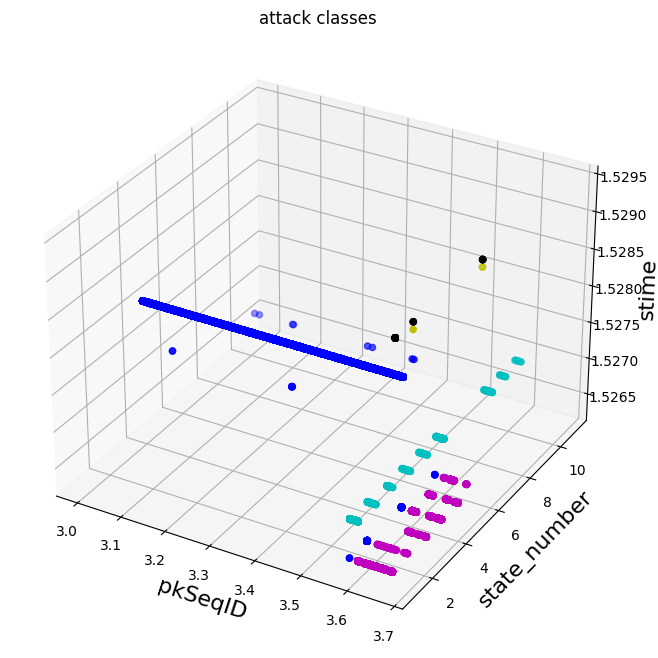

In [17]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📈 Plot feature importance
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: Feature importance are plotted depending on the XGBoost classifer
</div>

In [18]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

UDP:b
Normal:b
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


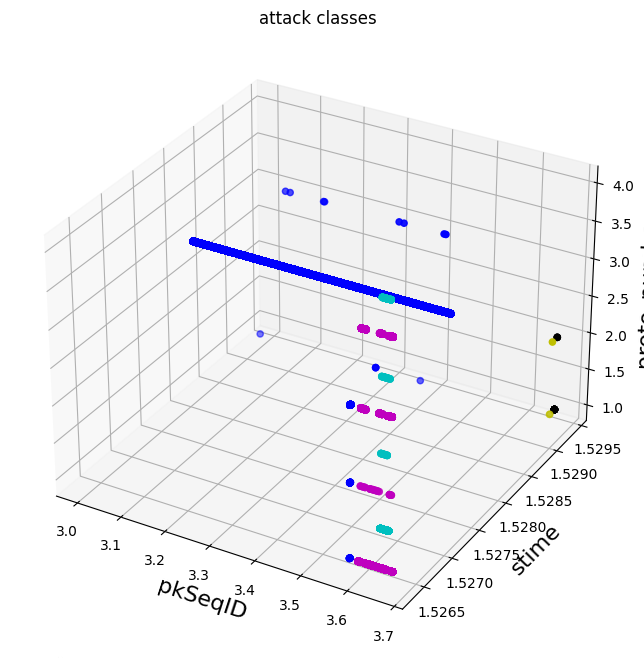

In [19]:
def plot_lesser_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-5:][::-2]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
plot_lesser_gain_features(clf)

In [20]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

UDP:b
Normal:b
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


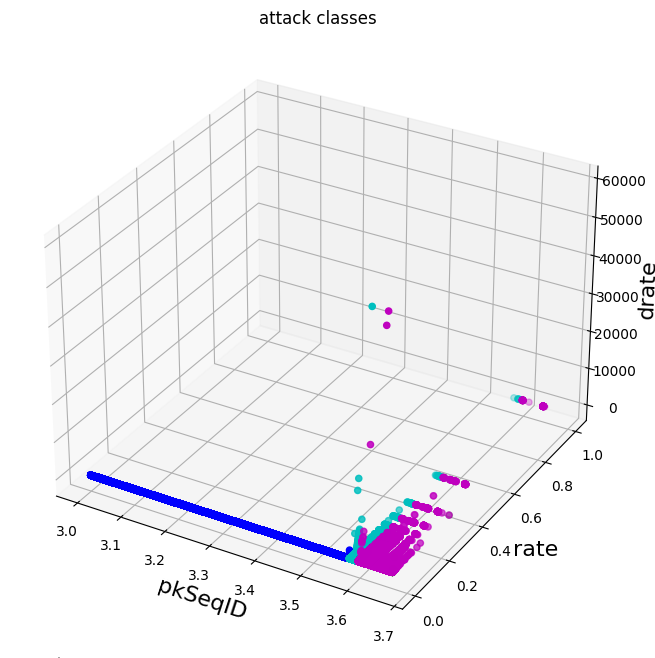

In [21]:
def plot_lesser_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-7:][::-3]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
plot_lesser_gain_features(clf)

UDP:b
Normal:g
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


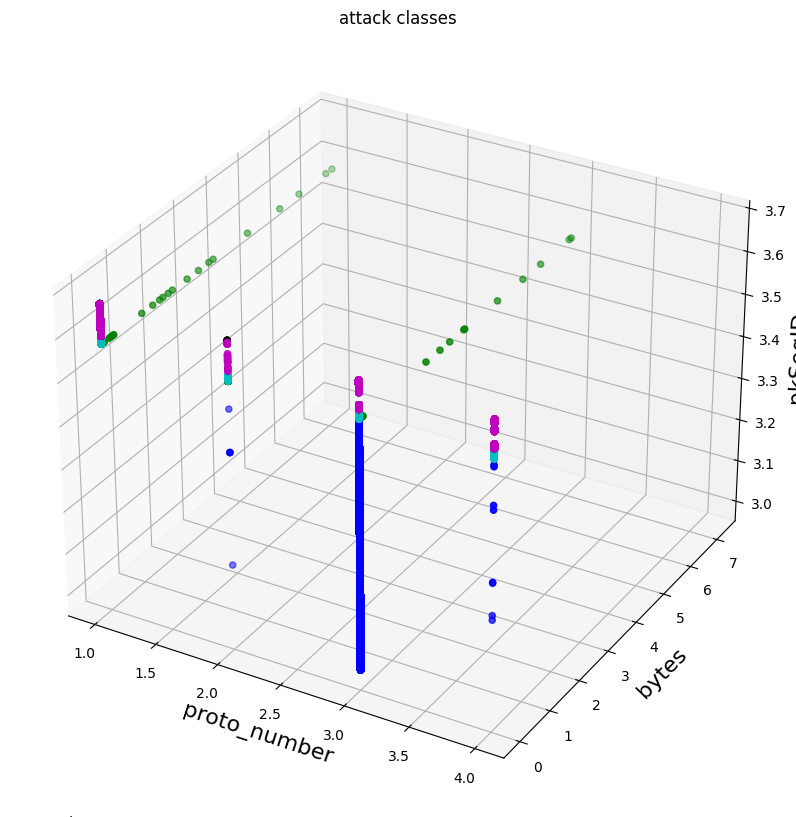

In [22]:
def plot_attacks_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (10, 12))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat or target == 'blacklist':
            color='b'
        else:
            color=c[c_index%len(c)]

            print(target+":"+color)
            ax.scatter(x_data, y_data, z_data, c=color)
            c_index=c_index+1

    plt.show()

def plot_other_gain_features(clf,a,b,c):
    
    x, y, z = a,b,c
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_attacks_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'background')
plot_other_gain_features(clf,3,5,0)

UDP:b
Normal:g
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


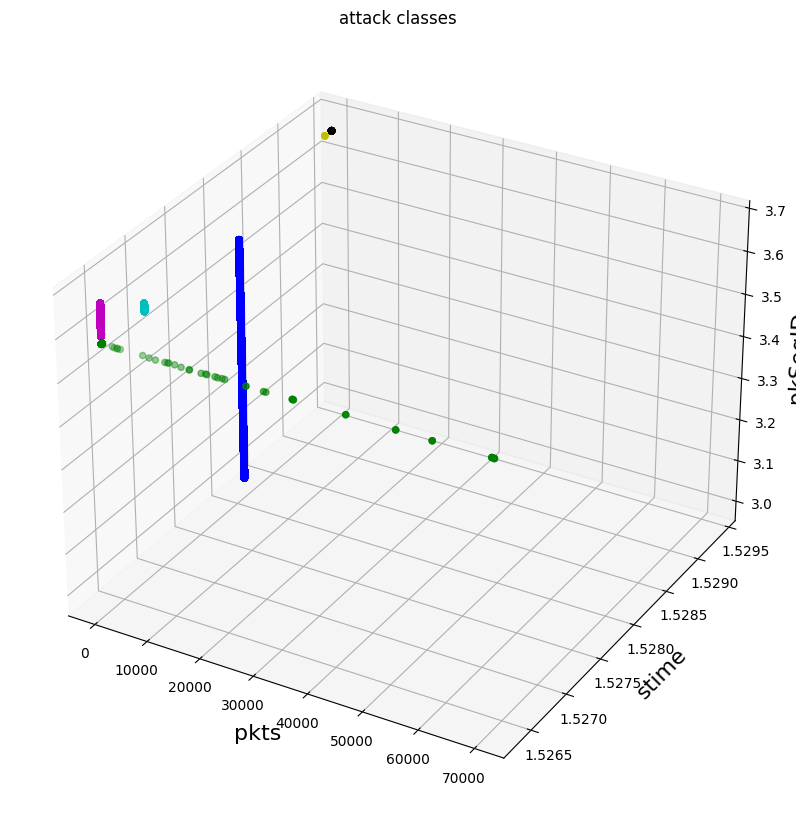

In [23]:
plot_other_gain_features(clf,4,1,0)

UDP:b
Normal:g
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


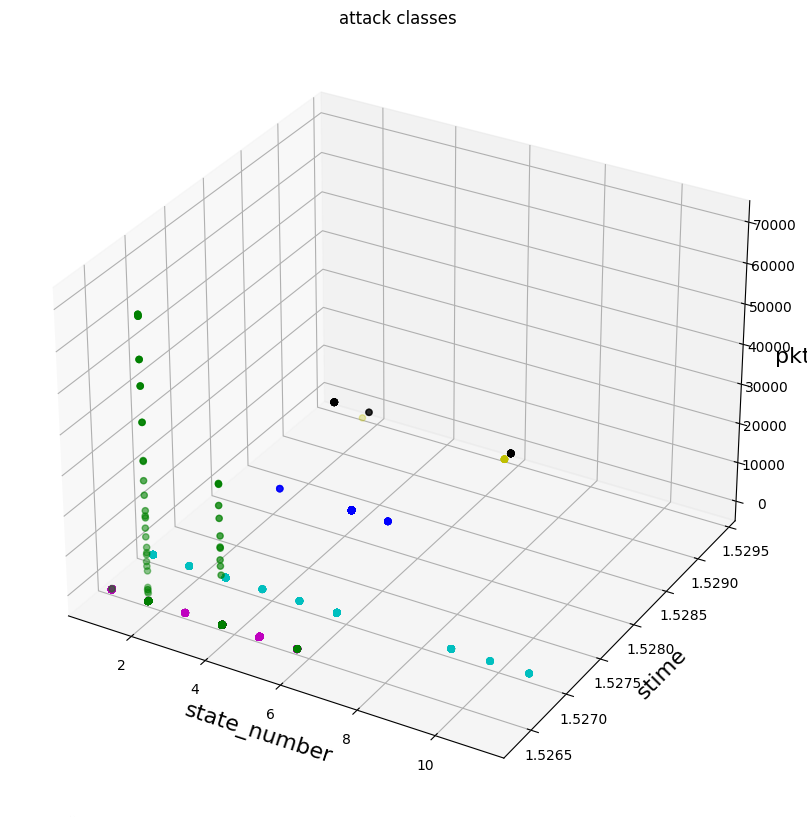

In [24]:
plot_other_gain_features(clf,6,1,4)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔴🔵 Apply ML classification models
</div>


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📊 Extract classification accuracy metrics
</div>


In [26]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

def classwise_balanced_accuracy(y_test, pred_target, num_classes):
    class_balanced_accuracy = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        
        balanced_accuracy = (sensitivity + specificity) / 2
        class_balanced_accuracy[cls] = balanced_accuracy
    
    return class_balanced_accuracy

def classwise_mcc(y_test, pred_target, num_classes):
    class_mcc = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        numerator = (true_positive * true_negative) - (false_positive * false_negative)
        denominator = np.sqrt((true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative))
        
        # Handling the case when the denominator is zero
        if denominator == 0:
            mcc = 0
        else:
            mcc = numerator / denominator
        
        class_mcc[cls] = mcc
    
    return class_mcc

In [27]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]

    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    print(class_mcc)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'OD (numerical features)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           1]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           3,
                                           'OD (numerical features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           1]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'OD (numerical features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           1]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'OD (numerical features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           1]
    
    
    
    for cls, bal_acc in class_balanced_accuracies.items():
         print(f'Class_{cls}', cls, ' Balanced Accuracy ', type(classifier).__name__, ' ', bal_acc)
    #     df_scores.loc[len(df_scores.index)] = [f'Class_{cls}', cls, 'Balanced Accuracy', type(classifier).__name__, bal_acc, 5]
        
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [28]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [29]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 13:38:17.528009
{0: 0.9615384615384616, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.999971974272382, 5: 1.0}
{0: 0.9607449548390301, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.9997462465689009, 5: 1.0}
Class_0 0  Balanced Accuracy  KNeighborsClassifier   0.9615384615384616
Class_1 1  Balanced Accuracy  KNeighborsClassifier   1.0
Class_2 2  Balanced Accuracy  KNeighborsClassifier   1.0
Class_3 3  Balanced Accuracy  KNeighborsClassifier   1.0
Class_4 4  Balanced Accuracy  KNeighborsClassifier   0.999971974272382
Class_5 5  Balanced Accuracy  KNeighborsClassifier   1.0
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision   Recall       TNR  TPR  Accuracy  F1_score  \
0  KNeighbors    0.99995  0.99995  0.923077  1.0   0.99995  0.999949   

   Balanced_accuracy       MCC    Error               fit_time  \
0           0.987179  0.999797

In [30]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.999950  0.999950  0.923077  1.000000  0.999950  0.999949   
1  DecisionTree   0.999938  0.999938  0.909091  1.000000  0.999938  0.999937   
2  RandomForest   0.999404  0.999501  0.333333  1.000000  0.999501  0.999363   
3       Bagging   0.999964  0.999975  0.981132  0.999988  0.999975  0.999969   
4           XGB   0.999988  0.999988  0.981132  1.000000  0.999988  0.999988   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.987179  0.999797  0.000050 0 days 00:00:00.086695   
1           0.803095  0.999746  0.000062 0 days 00:00:00.866228   
2           0.564103  0.997970  0.000499 0 days 00:00:27.066721   
3           0.833315  0.999898  0.000025 0 days 00:00:06.847416   
4           0.999981  0.999949  0.000012 0 days 00:00:48.230004   

               pred_time  
0 0 days 00:00:55.177368  
1 0 days 00:00:00.015562  
2 0 days 00:00:00.647812  
3 0 days

In [31]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [32]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [33]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [34]:
plot_confusion_matrixes("eval/output_numeric_only_report")

In [35]:
print(df_scores)

       attack_type  attack_label            approach_name  \
0             DDoS             2  OD (numerical features)   
1       Keylogging             3  OD (numerical features)   
2      ScanService             4  OD (numerical features)   
3   OS Fingerprint             1  OD (numerical features)   
4             DDoS             2  OD (numerical features)   
5       Keylogging             3  OD (numerical features)   
6      ScanService             4  OD (numerical features)   
7   OS Fingerprint             1  OD (numerical features)   
8             DDoS             2  OD (numerical features)   
9       Keylogging             3  OD (numerical features)   
10     ScanService             4  OD (numerical features)   
11  OS Fingerprint             1  OD (numerical features)   
12            DDoS             2  OD (numerical features)   
13      Keylogging             3  OD (numerical features)   
14     ScanService             4  OD (numerical features)   
15  OS Fingerprint      

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:lightgreen;">
    <a id="default-features"></a>
    📌 Approach 2: Full dataset with dropping out time features
</div>

In [36]:
['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']

['pkSeqID',
 'stime',
 'flgs',
 'flgs_number',
 'proto',
 'proto_number',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'pkts',
 'bytes',
 'state',
 'state_number',
 'ltime',
 'seq',
 'dur',
 'mean',
 'stddev',
 'sum',
 'min',
 'max',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'srate',
 'drate',
 'TnBPSrcIP',
 'TnBPDstIP',
 'TnP_PSrcIP',
 'TnP_PDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'attack',
 'category',
 'subcategory']

In [37]:
df_numerical_data_filtered = df_numerical_data.drop(columns = ['pkSeqID', 'stime', 'ltime', 'seq', 'TnBPSrcIP',
 'TnBPDstIP',
 'TnP_PSrcIP',
 'TnP_PDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP'], axis=1)
if verbose:
    print(df_numerical_data_filtered.columns)
    print(df_categorical_data.columns)

Index(['flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'dur',
       'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'proto_id'],
      dtype='object')
Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state',
       'source_node', 'dst_node', 'edge', 'edge_label'],
      dtype='object')


#### Split the dataframe into **Train** and **Test** subsets of df

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_numerical_data_filtered,targets_num,test_size=0.12, train_size=0.30,random_state=42)

#### Visualize feature values (euclidian data)

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data_filtered.columns.tolist()[x]
    y_feature = df_numerical_data_filtered.columns.tolist()[y]
    z_feature = df_numerical_data_filtered.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data_filtered[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data_filtered[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data_filtered[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

UDP:b
Normal:b
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


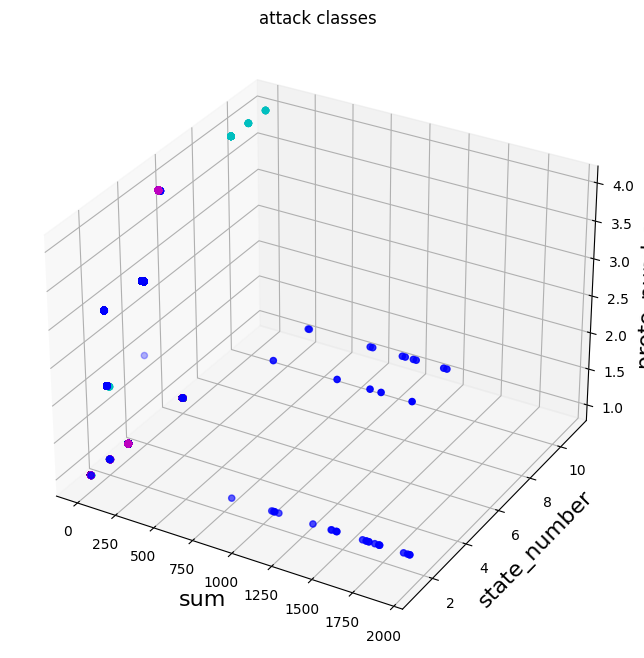

In [40]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

#### Plot feature importance

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Feature importance are plotted depending on the XGBoost classifer
</div>

In [41]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

#### Apply ML classification models

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

#### Extract classification accuracy metrics

In [43]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 2]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 2]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 2]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'OD (common features except t_features)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           2]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'OD (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           2]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'OD (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           2]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           3,
                                           'OD (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           2]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [44]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [45]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 13:42:10.890542
{0: 0.9423014554051876, 1: 0.7010233848116478, 2: 0.9998654225731204, 3: 0.5714223380250084, 4: 0.9319415922699278, 5: 0.5}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  KNeighbors   0.969315  0.970593  0.019135  0.999987  0.970593  0.969876   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.554191  0.880163  0.029407 0 days 00:00:00.041180   

               pred_time  
0 0 days 00:00:45.548083  
Evaluating: DecisionTree
2024-02-19 13:42:58.212787
{0: 0.9422827446976734, 1: 0.6618647615291497, 2: 0.9999551408577068, 3: 0.7856457182750926, 4: 0.9448215911116872, 5: 0.4999875341253319}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy'

In [46]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.969315  0.970593  0.019135  0.999987  0.970593  0.969876   
1  DecisionTree   0.968423  0.971478  0.019742  0.999949  0.971478  0.969411   
2  RandomForest   0.977273  0.971541  0.002185  1.000000  0.971541  0.959018   
3       Bagging   0.968760  0.972451  0.022134  0.999987  0.972451  0.969633   
4           XGB   0.970879  0.974296  0.024148  0.999987  0.974296  0.967687   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.554191  0.880163  0.029407 0 days 00:00:00.041180   
1           0.616715  0.883813  0.028522 0 days 00:00:00.962164   
2           0.349506  0.885962  0.028459 0 days 00:00:16.836310   
3           0.627179  0.887881  0.027549 0 days 00:00:07.687566   
4           0.615637  0.896249  0.025704 0 days 00:01:01.024668   

               pred_time  
0 0 days 00:00:45.548083  
1 0 days 00:00:00.011700  
2 0 days 00:00:00.584844  
3 0 days

In [47]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [48]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [49]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [50]:
plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 3: Timeseries with default features
</div>


'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'dur',
       'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'proto_id'

In [51]:
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['category'].unique())

# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Service_Scan')]
# print(df_to_sample['category'].unique())

if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')
# Extract columns
df_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',
                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate']]
df_timeseries = df_timeseries.sort_values(by=['stime'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['stime', 'datetime', 'saddr', 'daddr'], as_index=False).agg({
    'pkts': 'sum', 'bytes': 'sum', 'attack': 'first', 'category':'first', 'subcategory':'first',
    'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
, 'drate': 'mean', 'weight':'sum'})

print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()
subcategory_counts = df_timeseries['subcategory'].value_counts()
print("Subcategory Counts:")
print(subcategory_counts)


# Separate the data into two DataFrames based on the category
df_normal = df_timeseries_tmp[df_timeseries_tmp['category'] == 'Normal']
df_ddos = df_timeseries_tmp[df_timeseries_tmp['category'] == 'DDoS']
df_scan_service = df_timeseries_tmp[df_timeseries_tmp['category'] == 'DDoS']
# Randomly sample 58 instances from the "Normal" category
df_normal_sampled = df_normal.sample(n=58, random_state=1)

# Concatenate the sampled "Normal" instances with the "DDoS" instances
df_ddos_normal_sampled = pd.concat([df_normal_sampled, df_ddos], axis=0)

# Optionally, to check the unique categories and their counts in the new DataFrame
if verbose:
    print(df_ddos_normal_sampled['category'].value_counts())

['DDoS' 'Normal' 'Reconnaissance' 'Theft']
(668500, 51)
         stime            datetime            saddr           daddr    pkts  \
0   1526344032 2018-05-15 00:27:12    192.168.100.3  192.168.100.55   59453   
1   1526344032 2018-05-15 00:27:12   192.168.100.46   192.168.100.5  119335   
2   1526344032 2018-05-15 00:27:12    192.168.100.5   192.168.100.3   18431   
3   1526344032 2018-05-15 00:27:12    192.168.100.6   192.168.100.3   10056   
4   1526344032 2018-05-15 00:27:12    192.168.100.7   192.168.100.3   16326   
5   1526344033 2018-05-15 00:27:13    192.168.100.3    13.55.154.73    3018   
6   1526344121 2018-05-15 00:28:41    192.168.100.1   192.168.100.3       4   
7   1526344223 2018-05-15 00:30:23    192.168.100.7   192.168.100.4      10   
8   1526344227 2018-05-15 00:30:27  192.168.100.149  27.124.125.250       2   
9   1526344228 2018-05-15 00:30:28    192.168.100.4   192.168.100.7      10   
10  1526344232 2018-05-15 00:30:32  192.168.100.149   192.168.100.1       6

In [52]:
df_timeseries_tmp['subcategory'] = df_timeseries_tmp['subcategory'].replace(map_dict)

In [53]:
from sklearn.model_selection import train_test_split
targets_num = df_timeseries_tmp['subcategory']
print(df_timeseries_tmp)
df_timeseries_tmp = df_timeseries_tmp.drop(columns = ['stime', 'category', 'datetime', 'saddr', 'daddr', 'attack', 'subcategory'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_timeseries_tmp,targets_num,test_size=0.12, train_size=0.30,random_state=42)

            stime            datetime            saddr            daddr  \
0      1526344032 2018-05-15 00:27:12    192.168.100.3   192.168.100.55   
1      1526344032 2018-05-15 00:27:12   192.168.100.46    192.168.100.5   
2      1526344032 2018-05-15 00:27:12    192.168.100.5    192.168.100.3   
3      1526344032 2018-05-15 00:27:12    192.168.100.6    192.168.100.3   
4      1526344032 2018-05-15 00:27:12    192.168.100.7    192.168.100.3   
...           ...                 ...              ...              ...   
26770  1529380790 2018-06-19 03:59:50  192.168.100.150    192.168.100.3   
26771  1529380790 2018-06-19 03:59:50    192.168.100.3  192.168.100.149   
26772  1529380790 2018-06-19 03:59:50    192.168.100.3  192.168.100.150   
26773  1529380791 2018-06-19 03:59:51  192.168.100.150    192.168.100.3   
26774  1529380791 2018-06-19 03:59:51    192.168.100.3  192.168.100.150   

         pkts      bytes  attack category  subcategory           rate  \
0       59453   60884536  

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

UDP:b
Normal:b
OS_Fingerprint:c
Service_Scan:m
Data_Exfiltration:y
Keylogging:k


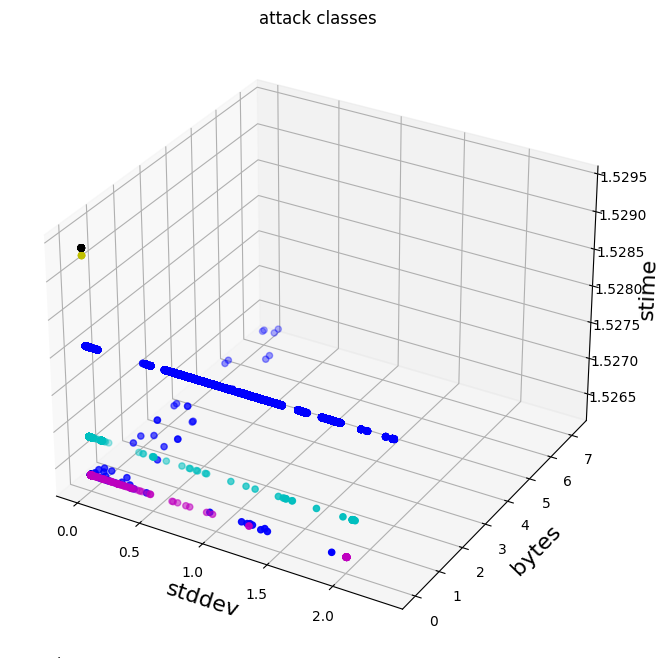

In [55]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

In [56]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [58]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 3]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 3]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 3]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'Timeseries (common features except t_features)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           3]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'Timeseries (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           3]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'Timeseries (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           3]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           3,
                                           'Timeseries (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           3]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [59]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [60]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 13:44:57.837667
{0: 0.8649765215820842, 1: 0.7701603492538542, 2: 0.6109550561797753, 3: 0.4998441396508728, 4: 0.8526118419125187, 5: 0.5}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision    Recall   TNR       TPR  Accuracy  F1_score  \
0  KNeighbors   0.978727  0.981637  0.45  0.995212  0.981637  0.979691   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.416088  0.702144  0.018363 0 days 00:00:00.042692   

               pred_time  
0 0 days 00:00:00.348695  
Evaluating: DecisionTree
2024-02-19 13:44:58.410307
{0: 0.9174191800614051, 1: 0.8903570791175299, 2: 0.8333333333333333, 3: 0.7998441396508729, 4: 0.9217604664108048, 5: 0.5}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_

In [61]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.978727  0.981637  0.450000  0.995212  0.981637  0.979691   
1  DecisionTree   0.990035  0.990663  0.630769  0.998094  0.990663  0.990210   
2  RandomForest   0.975768  0.981326  0.301205  0.999361  0.981326  0.977107   
3       Bagging   0.991654  0.992219  0.650794  0.999048  0.992219  0.991867   
4           XGB   0.991595  0.992219  0.636364  0.999682  0.992219  0.991708   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.416088  0.702144  0.018363 0 days 00:00:00.042692   
1           0.647346  0.854374  0.009337 0 days 00:00:00.025407   
2           0.345850  0.670417  0.018674 0 days 00:00:00.506093   
3           0.691683  0.879240  0.007781 0 days 00:00:00.172370   
4           0.665858  0.877318  0.007781 0 days 00:00:01.454306   

               pred_time  
0 0 days 00:00:00.348695  
1 0 days 00:00:00.002441  
2 0 days 00:00:00.032067  
3 0 days

In [62]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [63]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [64]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [65]:
plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 4: Timewindowing with default features
</div>


In [66]:
"""""""""
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['category'].unique())

# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]
# print(df_to_sample['category'].unique())

if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')
# Extract columns
df_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',
                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate',
                             'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
                             'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
                              'Pkts_P_State_P_Protocol_P_SrcIP']]
df_timeseries = df_timeseries.sort_values(by=['stime'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['stime', 'datetime', 'saddr', 'daddr'], as_index=False).agg({
    'pkts': 'sum', 'bytes': 'sum', 'attack': 'first', 'category':'first', 'subcategory':'first',
    'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
, 'drate': 'mean', 'TnBPSrcIP': 'mean', 'TnBPDstIP': 'mean', 'TnP_PSrcIP': 'mean', 'TnP_PDstIP': 'mean', 'TnP_PerProto': 'mean', 'TnP_Per_Dport': 'mean'
, 'TnP_Per_Dport': 'mean', 'AR_P_Proto_P_SrcIP': 'mean', 'AR_P_Proto_P_DstIP': 'mean', 'N_IN_Conn_P_DstIP': 'mean', 'N_IN_Conn_P_SrcIP': 'mean'
, 'AR_P_Proto_P_Sport': 'mean', 'AR_P_Proto_P_Dport': 'mean', 'Pkts_P_State_P_Protocol_P_DestIP': 'mean', 'Pkts_P_State_P_Protocol_P_SrcIP': 'mean', 'weight':'sum'})

print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()
"""""""""

"\ndf_original_data_tmp = df_original_data.copy() \ndf_original_data_tmp['weight'] = 1\ndf_to_sample = df_original_data_tmp.copy()\nprint(df_to_sample['category'].unique())\n\n# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]\n# print(df_to_sample['category'].unique())\n\nif verbose:\n    print(df_original_data_tmp.shape)\n\ndf_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')\n# Extract columns\ndf_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',\n                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate',\n                             'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_

In [67]:
""""""""""
map_dict_1 = {
    'Normal': 0,
    'OS_Fingerprint': 1,
    'UDP': 2,
    'Keylogging': 3,
    'Service_Scan': 4,
    'Data_Exfiltration': 5  
}
"""""""""

'"\nmap_dict_1 = {\n    \'Normal\': 0,\n    \'OS_Fingerprint\': 1,\n    \'UDP\': 2,\n    \'Keylogging\': 3,\n    \'Service_Scan\': 4,\n    \'Data_Exfiltration\': 5  \n}\n'

In [68]:
# df_timeseries_tmp['subcategory'] = df_timeseries_tmp['subcategory'].replace(map_dict_1)

In [69]:
# def get_first_value(series):
#    return series.iloc[0]

In [70]:
""""""""""
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

df = df_timeseries_tmp.copy()
df_topredict = pd.DataFrame()

# print('df\n', df)
df['next_stime'] = df['stime'] + 60
df['next_datetime'] = pd.to_datetime(df['next_stime'], unit='s')

count_one_min_windows = 0

for index, row in df.iterrows():
    attack_label =0
    current_timestamp = row['stime']
    next_timestamp = row['next_stime']
    mask = (df['stime'] <= next_timestamp) & (df['stime'] >= current_timestamp)
    time_window = df[mask]
    unique_time_window = time_window.iloc[:, 0].unique()
    
    if len(unique_time_window) >= 10:
        # print(unique_time_window)
        count_one_min_windows += 1
        
        # ts1
        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]
        mask = (time_window['stime'] <= ts1) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        # ts2
        ts2 = unique_time_window[len(unique_time_window) - 1]
        mask = (time_window['stime'] <= ts2) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        # print(sub_time_window['subcategory'].unique())
        if (sub_time_window.tail(1)['subcategory'] != 0).any():
            attack_label = sub_time_window.tail(1)['subcategory'].item()   
        
        agg_series = sub_time_window.agg({
            'pkts': 'sum', 'bytes': 'sum', 'attack': get_first_value, 
            'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
            , 'drate': 'mean', 'TnBPSrcIP': 'mean', 'TnBPDstIP': 'mean', 'TnP_PSrcIP': 'mean', 'TnP_PDstIP': 'mean', 'TnP_PerProto': 'mean', 'TnP_Per_Dport': 'mean'
            , 'TnP_Per_Dport': 'mean', 'AR_P_Proto_P_SrcIP': 'mean', 'AR_P_Proto_P_DstIP': 'mean', 'N_IN_Conn_P_DstIP': 'mean', 'N_IN_Conn_P_SrcIP': 'mean'
            , 'AR_P_Proto_P_Sport': 'mean', 'AR_P_Proto_P_Dport': 'mean', 'Pkts_P_State_P_Protocol_P_DestIP': 'mean', 'Pkts_P_State_P_Protocol_P_SrcIP': 'mean', 'weight':'sum'
        })

        # Convert the series to a single-row DataFrame
        agg_row = agg_series.to_frame().transpose()
        
        agg_row['attack'] = attack_label
        # df_topredict = df_topredict.append(new_row, ignore_index=True)
        # Append the new row data to a list
        # new_rows_list = [new_row]

        # Concatenate the list of dictionaries into a new DataFrame
        df_topredict = pd.concat([df_topredict, agg_row], ignore_index=True)
        # print(len(df_topredict))
print(len(df), count_one_min_windows)
print(len(df_topredict))
print(df_topredict)
"""""""""

'"\nimport pandas as pd\nimport networkx as nx\nimport matplotlib.pyplot as plt\nfrom datetime import datetime, timedelta\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\ndf = df_timeseries_tmp.copy()\ndf_topredict = pd.DataFrame()\n\n# print(\'df\n\', df)\ndf[\'next_stime\'] = df[\'stime\'] + 60\ndf[\'next_datetime\'] = pd.to_datetime(df[\'next_stime\'], unit=\'s\')\n\ncount_one_min_windows = 0\n\nfor index, row in df.iterrows():\n    attack_label =0\n    current_timestamp = row[\'stime\']\n    next_timestamp = row[\'next_stime\']\n    mask = (df[\'stime\'] <= next_timestamp) & (df[\'stime\'] >= current_timestamp)\n    time_window = df[mask]\n    unique_time_window = time_window.iloc[:, 0].unique()\n    \n    if len(unique_time_window) >= 10:\n        # print(unique_time_window)\n        count_one_min_windows += 1\n        \n        # ts1\n        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]\n        mask = (time_window[\'stime\'] <= ts1) 

In [71]:
""""""""""
from sklearn.model_selection import train_test_split
targets_num = df_topredict['attack']
print(targets_num) 
df_topredict_tmp = df_topredict.drop(columns = ['attack'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_topredict_tmp,targets_num,test_size=0.3, train_size=0.7,random_state=42)
"""""""""

'"\nfrom sklearn.model_selection import train_test_split\ntargets_num = df_topredict[\'attack\']\nprint(targets_num) \ndf_topredict_tmp = df_topredict.drop(columns = [\'attack\'], axis=1)\nX_train, X_test, y_train, y_test = train_test_split(df_topredict_tmp,targets_num,test_size=0.3, train_size=0.7,random_state=42)\n'

In [72]:
""""""""""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
"""""""""

'"\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\ndef plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):\n\n    fig = plt.figure(figsize = (8, 8))\n    ax = fig.add_subplot(111, projection="3d")\n\n\n    ax.set_xlabel(x_feature, size=16)\n    ax.set_ylabel(y_feature, size=16)\n    ax.set_zlabel(z_feature, size=16)\n\n    ax.set_title("attack classes")\n\n    c=[\'b\',\'g\',\'c\',\'m\',\'y\',\'k\',\'r\']\n    c_index=0\n\n    for target in plot_data[target_label].unique():\n\n        current=plot_data.loc[plot_data[target_label]==target]\n        x_data=current[x_feature]\n        y_data=current[y_feature]\n        z_data=current[z_feature]\n\n        if target == normal_cat:\n            color=\'b\'\n        else:\n            color=c[c_index%len(c)]\n\n        print(target+":"+color)\n        ax.scatter(x_data, y_data, z_data, c=color)\n        c_index=c_index+1\n\n    plt.show()\n    \n    \ndef plot_high_gain_features(c

In [73]:
""""""""""
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)
"""""""""

'"\nfrom xgboost import XGBClassifier\n\nclf = XGBClassifier(tree_method="auto")\nclf=clf.fit(X_train,y_train)\ny_pred = clf.predict(X_test)\n\nplot_high_gain_features(clf)\n'

In [74]:
""""""""""
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')
"""""""""

'"\nimport plotly.express as px\n\ndef plot_importance(clf, metric = \'all\'):\n    \n    importance = pd.DataFrame()\n    importance[\'Features\'] = clf.feature_names_in_\n    \n    if metric == \'all\' or metric == \'gain\':\n    \n        importance[\'Gain\'] = clf.feature_importances_\n        importance = importance.sort_values(by=[\'Gain\'],ascending=False)\n        fig = px.bar(importance,x=\'Gain\', y=\'Features\',color =\'Features\',orientation =\'h\')\n        fig.update_yaxes(categoryorder="total ascending")\n\n        fig.show()\n    \n    if metric == \'all\' or metric == \'weight\':\n        weights = clf.get_booster().get_score(importance_type=\'weight\')\n        w = []\n        for elm in importance[\'Features\']:\n            try:\n                w.append(weights[elm])\n            except:\n                w.append(0)\n        importance[\'Weight\'] = w\n        importance = importance.sort_values(by=[\'Weight\'],ascending=False)\n        fig = px.bar(importance,x=\'

In [75]:
""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]
"""""""""

'"\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.neural_network import MLPClassifier\n\nclf_names = [\n    "Nearest Neighbors",\n    "Decision Tree",\n    "Random Forest",\n    "Bagging",\n    "Extra Trees",\n    #"Gradient Boosting",\n    "XGBoost",\n    "MLP"#,\n    #"Linear SVM",\n    #"RBF SVM",\n    #"Histogram-based Gradient Boosting"\n]\n\nclassifiers = [KNeighborsClassifier(3),\n               DecisionTreeClassifier(),\n               RandomForestClassifier(max_depth=3, random_state=0),\n               BaggingClassifier(n_estimators=10, random_state=0),\n               # ExtraTreesClassifier(n_estimators=100, random_state=0),\n               # GradientBoostingClassifier(n_estimators=100, learning

In [76]:
""""""""""
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW without smetrics', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score']]
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])
"""""""""

'"\nfrom pandas import DataFrame\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss\nfrom sklearn.metrics import classification_report, confusion_matrix\n\neval_df=DataFrame(columns=[\'Classifier\',\n                           \'Precision\',\n                           \'Recall\',\n                           \'TNR\',\n                           \'TPR\',\n                           \'Accuracy\',\n                           \'F1_score\',\n                           \'Balanced_accuracy\',\n                           \'MCC\',\n                           #\'AUROC\',\n                           #\'AUPRC\',\n                           \'Error\',\n                           \'fit_time\',\n                           \'pred_time\'])\n                           #\'Cross_validation_mean\'])\ncm_df=DataFrame(columns=[\'Classifier\',\'Confusion_Matrix\', \

In [77]:
""""""""""
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)
"""""""""

'"\ndef store_eval(eval_type):\n    os.chdir(\'/kaggle/working/\')\n    os.makedirs(\'eval/\', exist_ok=True)\n    eval_df.to_csv(\'eval/output_\'+eval_type, index=False)\n    cm_df.to_csv(\'eval/output_\'+eval_type+\'_report\', index=False)\n'

In [78]:
""""""""""
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')
"""""""""

'"\nfrom datetime import datetime\n\nif eval_ML:\n    for clf in classifiers:\n        print(\'Evaluating: \' + type(clf).__name__.replace(\'Classifier\',\'\'))\n        print(datetime.now())\n        start_time =   datetime.now()\n        clf=clf.fit(X_train,y_train)\n        fit_time =  datetime.now() - start_time\n        y_pred = clf.predict(X_test)\n        pred_time =  datetime.now() - start_time - fit_time\n        eval_clf(clf,y_test,y_pred, fit_time, pred_time)\n    store_eval(\'numeric_only\')\n'

In [79]:
# if verbose:
#    show_eval()

In [80]:

""""""""""
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()
"""""""""

'"\nimport plotly.express as px\nimport re\n\ndef plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):\n    eval_df = pd.read_csv(results_path)\n    # ordering columns\n    col_order = ["Classifier"] + metrics\n    eval_df = eval_df[col_order]\n    # Melt the dataframe to convert the metrics into a single column\n    melted_df = pd.melt(eval_df, id_vars=[\'Classifier\'], var_name=\'Metric\', value_name=\'Value\')\n\n    # selecting only the desired metrics\n    melted_df = melted_df[melted_df[\'Metric\'].isin(metrics)]\n\n    # Create the bar chart\n    fig = px.bar(melted_df, x=\'Classifier\', y=\'Value\', color=\'Metric\', barmode=\'group\', hover_data={"Metric":True,\n                                                                                                    "Classifier":False,\n                                                                                                    "Value":True})\n    \n   

In [81]:
# plot_evals('/kaggle/working/eval/output_numeric_only')
# plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
# plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 5: Timewindowing with default features and spectral metrics
</div>


In [82]:
map_dict_1 = {
    'Normal': 0,
    'OS_Fingerprint': 1,
    'UDP': 2,
    'Keylogging': 3,
    'Service_Scan': 4,
    'Data_Exfiltration': 5  
}

In [83]:
import numpy as np
import math
from scipy.misc import derivative
import statistics

def metric1(spec, num_components):
    M1 = math.exp(1 / num_components) / math.exp(1)
    return M1
    
def metric2(spec, num_components):
    algebraic_conn = spec[num_components:num_components + num_components]
    mean = statistics.mean(algebraic_conn)
    return (np.exp(mean) - 1.0)

def metric3(spec, num_components):
    max_deg = spec[len(spec) - num_components:len(spec)]
    mean = statistics.mean(max_deg)
    return mean

def metric4(spec):
    x = np.arange(len(spec))
    dx = np.diff(x)
    count = 0
    for k in range(len(dx) - 1):
        if dx[k] > math.pow(10, -12):
            count += 1
    return count

In [84]:
import networkx as nx

def extract_graph(tw, src, dst, ts, edge_weight):
    g = nx.Graph()
    
    for _, row in tw.iterrows():
        src_ip = row[src]
        dst_ip = row[dst]
        weight = row[edge_weight]

        if g.has_edge(src_ip, dst_ip):
            g[src_ip][dst_ip]['weight'] += weight
        elif g.has_edge(dst_ip, src_ip):
            g[dst_ip][src_ip]['weight'] += weight
        else:
            g.add_edge(src_ip, dst_ip, weight=weight)
    l = nx.laplacian_matrix(g, weight='weight').todense()
    ev = np.linalg.eigvalsh(l)
    return g, l, np.sort(ev)

def draw_graph(g):
    pos = nx.spring_layout(g)
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='lightblue')
    plt.title("Undirected Graph")
    plt.axis('off')
    plt.show()
    
def extract_vector_metrics(spectrum):
    # extract here
    print()
    
def plot_two_graphs(G1, G2, ts1, ts2, ev1, ev2):
    print(ts1)
    pos = nx.spring_layout(G1)
    nx.draw(G1,pos, with_labels=True, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G1, 'weight')
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
    plt.show()
    
    x = range(len(ev1))
    y = ev1

    plt.plot(x, y)
    plt.xlabel('index')
    plt.ylabel('eigenvalues')
    plt.title('spectrum')
    plt.show()
    
    print(ts2)
    pos = nx.spring_layout(G2)
    nx.draw(G2,pos, with_labels=True, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
    plt.show()
    
    x = range(len(ev2))
    y = ev2

    plt.plot(x, y)
    plt.xlabel('index')
    plt.ylabel('eigenvalues')
    plt.title('spectrum')
    plt.show()

In [85]:
include_m1 = 1
include_m2 = 1
include_m3 = 1
include_m4 = 1

In [86]:
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['category'].unique())

#df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]


if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')

df_to_sample['subcategory'] = df_to_sample['subcategory'].replace(map_dict_1)
# Extract columns
df_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',
                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate']]
df_timeseries = df_timeseries.sort_values(by=['stime'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['stime', 'datetime', 'saddr', 'daddr'], as_index=False).agg({
    'pkts': 'sum', 'bytes': 'sum', 'attack': 'first', 'category':'first', 'subcategory':'first',
    'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
, 'drate': 'mean', 'weight':'sum'})
print(df_timeseries['subcategory'].unique())
print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()

['DDoS' 'Normal' 'Reconnaissance' 'Theft']
(668500, 51)
[0 4 1 2 5 3]
         stime            datetime            saddr           daddr    pkts  \
0   1526344032 2018-05-15 00:27:12    192.168.100.3  192.168.100.55   59453   
1   1526344032 2018-05-15 00:27:12   192.168.100.46   192.168.100.5  119335   
2   1526344032 2018-05-15 00:27:12    192.168.100.5   192.168.100.3   18431   
3   1526344032 2018-05-15 00:27:12    192.168.100.6   192.168.100.3   10056   
4   1526344032 2018-05-15 00:27:12    192.168.100.7   192.168.100.3   16326   
5   1526344033 2018-05-15 00:27:13    192.168.100.3    13.55.154.73    3018   
6   1526344121 2018-05-15 00:28:41    192.168.100.1   192.168.100.3       4   
7   1526344223 2018-05-15 00:30:23    192.168.100.7   192.168.100.4      10   
8   1526344227 2018-05-15 00:30:27  192.168.100.149  27.124.125.250       2   
9   1526344228 2018-05-15 00:30:28    192.168.100.4   192.168.100.7      10   
10  1526344232 2018-05-15 00:30:32  192.168.100.149   192.168

In [87]:
 def get_first_value(series):
    return series.iloc[0]

In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


df = df_timeseries_tmp.copy()
df_topredict = pd.DataFrame()

df['next_stime'] = df['stime'] + 60
df['next_datetime'] = pd.to_datetime(df['next_stime'], unit='s')

count_one_min_windows = 0

for index, row in df.iterrows():
    attack_label =0
    current_timestamp = row['stime']
    next_timestamp = row['next_stime']
    mask = (df['stime'] <= next_timestamp) & (df['stime'] >= current_timestamp)
    time_window = df[mask]
    unique_time_window = time_window.iloc[:, 0].unique()
    
    if len(unique_time_window) >= 10:
        
        # print(unique_time_window)
        count_one_min_windows += 1
        
        # ts1
        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]
        mask = (time_window['stime'] <= ts1) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        g1_pkts, l1_pkts, ev1_pkts = extract_graph(sub_time_window, 'saddr', 'daddr', ts1, 'pkts')
        num_components_pkts = nx.number_connected_components(g1_pkts)
        
        t1_m1_pkts = metric1(ev1_pkts, num_components_pkts)
        t1_m2_pkts = metric2(ev1_pkts, num_components_pkts)
        t1_m3_pkts = metric3(ev1_pkts, num_components_pkts)
        t1_m4_pkts = metric4(ev1_pkts[1:])
        
        g1_bytes, l1_bytes, ev1_bytes = extract_graph(sub_time_window, 'saddr', 'daddr', ts1, 'bytes')
        num_components_bytes = nx.number_connected_components(g1_bytes)
        
        t1_m1_bytes = metric1(ev1_bytes, num_components_bytes)
        t1_m2_bytes = metric2(ev1_bytes, num_components_bytes)
        t1_m3_bytes = metric3(ev1_bytes, num_components_bytes)
        t1_m4_bytes = metric4(ev1_bytes[1:])
        
        g1_rate, l1_rate, ev1_rate = extract_graph(sub_time_window, 'saddr', 'daddr', ts1, 'rate')
        num_components_rate = nx.number_connected_components(g1_rate)
        
        t1_m1_rate = metric1(ev1_rate, num_components_rate)
        t1_m2_rate = metric2(ev1_rate, num_components_rate)
        t1_m3_rate = metric3(ev1_rate, num_components_rate)
        t1_m4_rate = metric4(ev1_rate[1:])
        
        # ts2
        ts2 = unique_time_window[len(unique_time_window) - 1]
        mask = (time_window['stime'] <= ts2) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        if (sub_time_window.tail(1)['subcategory'] != 0).any():
            attack_label = sub_time_window.tail(1)['subcategory'].item()
            
        
        g2_pkts, l2_pkts, ev2_pkts = extract_graph(sub_time_window, 'saddr', 'daddr', ts2, 'pkts')
        num_components_pkts = nx.number_connected_components(g2_pkts)
        
        t2_m1_pkts = metric1(ev1_pkts, num_components_pkts)
        t2_m2_pkts = metric2(ev1_pkts, num_components_pkts)
        t2_m3_pkts = metric3(ev1_pkts, num_components_pkts)
        t2_m4_pkts = metric4(ev1_pkts[1:])
        
        g2_bytes, l2_bytes, ev2_bytes = extract_graph(sub_time_window, 'saddr', 'daddr', ts2, 'bytes')
        num_components_bytes = nx.number_connected_components(g2_bytes)
        
        t2_m1_bytes = metric1(ev2_bytes, num_components_bytes)
        t2_m2_bytes = metric2(ev2_bytes, num_components_bytes)
        t2_m3_bytes = metric3(ev2_bytes, num_components_bytes)
        t2_m4_bytes = metric4(ev2_bytes[1:])
        
        g2_rate, l2_rate, ev2_rate = extract_graph(sub_time_window, 'saddr', 'daddr', ts2, 'rate')
        num_components_rate = nx.number_connected_components(g2_rate)
        
        t2_m1_rate = metric1(ev2_rate, num_components_rate)
        t2_m2_rate = metric2(ev2_rate, num_components_rate)
        t2_m3_rate = metric3(ev2_rate, num_components_rate)
        t2_m4_rate = metric4(ev2_rate[1:])
        
        d = {}
        if include_m1:
            d['t1_m1_pkts'] = [t1_m1_pkts]
            d['t2_m1_pkts'] = [t2_m1_pkts]
            d['t1_m1_bytes'] = [t1_m1_bytes]
            d['t2_m1_bytes'] = [t2_m1_bytes]
            d['t1_m1_rate'] = [t1_m1_rate]
            d['t2_m1_rate'] = [t2_m1_rate]
            
        if include_m2:
            d['t1_m2_pkts'] = [t1_m2_pkts]
            d['t2_m2_pkts'] = [t2_m2_pkts]
            d['t1_m2_bytes'] = [t1_m2_bytes]
            d['t2_m2_bytes'] = [t2_m2_bytes]
            d['t1_m2_rate'] = [t1_m2_rate]
            d['t2_m2_rate'] = [t2_m2_rate]
            
        if include_m3:
            d['t1_m3_pkts'] = [t1_m3_pkts]
            d['t2_m3_pkts'] = [t2_m3_pkts]
            d['t1_m3_bytes'] = [t1_m3_bytes]
            d['t2_m3_bytes'] = [t2_m3_bytes]
            d['t1_m3_rate'] = [t1_m3_rate]
            d['t2_m3_rate'] = [t2_m3_rate]
            
        if include_m4:
            d['t1_m4_pkts'] = [t1_m4_pkts]
            d['t2_m4_pkts'] = [t2_m4_pkts]
            d['t1_m4_bytes'] = [t1_m4_bytes]
            d['t2_m4_bytes'] = [t2_m4_bytes]
            d['t1_m4_rate'] = [t1_m4_rate]
            d['t2_m4_rate'] = [t2_m4_rate]
            
        agg_series = sub_time_window.agg({
            'pkts': 'sum', 'bytes': 'sum', 'attack': get_first_value, 
            'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
            , 'drate': 'mean', 'weight':'sum'
        })

        # Convert the series to a single-row DataFrame
        agg_row = agg_series.to_frame().transpose()
        # print(attack_label)
        agg_row['attack'] = attack_label
        
        if include_m1:
            agg_row['t1_m1_pkts'] = [t1_m1_pkts]
            agg_row['t2_m1_pkts'] = [t2_m1_pkts]
            agg_row['t1_m1_bytes'] = [t1_m1_bytes]
            agg_row['t2_m1_bytes'] = [t2_m1_bytes]
            agg_row['t1_m1_rate'] = [t1_m1_rate]
            agg_row['t2_m1_rate'] = [t2_m1_rate]
            
        if include_m2:
            agg_row['t1_m2_pkts'] = [t1_m2_pkts]
            agg_row['t2_m2_pkts'] = [t2_m2_pkts]
            agg_row['t1_m2_bytes'] = [t1_m2_bytes]
            agg_row['t2_m2_bytes'] = [t2_m2_bytes]
            agg_row['t1_m2_rate'] = [t1_m2_rate]
            agg_row['t2_m2_rate'] = [t2_m2_rate]
            
        if include_m3:
            agg_row['t1_m3_pkts'] = [t1_m3_pkts]
            agg_row['t2_m3_pkts'] = [t2_m3_pkts]
            agg_row['t1_m3_bytes'] = [t1_m3_bytes]
            agg_row['t2_m3_bytes'] = [t2_m3_bytes]
            agg_row['t1_m3_rate'] = [t1_m3_rate]
            agg_row['t2_m3_rate'] = [t2_m3_rate]
            
        if include_m4:
            agg_row['t1_m4_pkts'] = [t1_m4_pkts]
            agg_row['t2_m4_pkts'] = [t2_m4_pkts]
            agg_row['t1_m4_bytes'] = [t1_m4_bytes]
            agg_row['t2_m4_bytes'] = [t2_m4_bytes]
            agg_row['t1_m4_rate'] = [t1_m4_rate]
            agg_row['t2_m4_rate'] = [t2_m4_rate]
            
    
        # print(agg_row)
        # df_topredict = df_topredict.append(new_row, ignore_index=True)
        # Append the new row data to a list
        # new_rows_list = [new_row]

        # Concatenate the list of dictionaries into a new DataFrame
        df_topredict = pd.concat([df_topredict, agg_row], ignore_index=True)
        # print(len(df_topredict))
# print(len(df), count_one_min_windows)
# print(len(df_topredict))
print(df_topredict['attack'].unique())
print(df_topredict)


[4 0 1 2 3]
          pkts     bytes  attack          rate         dur      mean  \
0       9943.0  684092.0       4   2881.833323  121.422950  0.005430   
1       9943.0  684092.0       4   2881.833323  121.422950  0.005430   
2      10121.0  695268.0       4   2090.637763   84.294046  0.003159   
3      10313.0  708216.0       4   1036.679861   39.443936  0.001579   
4      10313.0  708216.0       4   1036.679861   39.443936  0.001579   
...        ...       ...     ...           ...         ...       ...   
26474    574.0   92756.0       3  19584.809472    0.343253  0.343253   
26475    570.0   92488.0       3  20727.913112    0.374444  0.374444   
26476    570.0   92488.0       3  20727.913112    0.374444  0.374444   
26477    566.0   92220.0       3  22149.065751    0.411873  0.411873   
26478    566.0   92220.0       3  22149.065751    0.411873  0.411873   

            sum       min       max     spkts  ...    t1_m3_bytes  \
0      0.007358  0.003797  0.007073  4.276229  ...  76

In [89]:
print(df_topredict['attack'].value_counts())
print(df_topredict['attack'].value_counts()/np.float(len(df_topredict)))
df_topredict.info()
df_topredict.isnull().sum()

attack
4    25223
0      827
1      376
3       37
2       16
Name: count, dtype: int64
attack
4    0.952566
0    0.031232
1    0.014200
3    0.001397
2    0.000604
Name: count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26479 entries, 0 to 26478
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pkts         26479 non-null  float64
 1   bytes        26479 non-null  float64
 2   attack       26479 non-null  int64  
 3   rate         26479 non-null  float64
 4   dur          26479 non-null  float64
 5   mean         26479 non-null  float64
 6   sum          26479 non-null  float64
 7   min          26479 non-null  float64
 8   max          26479 non-null  float64
 9   spkts        26479 non-null  float64
 10  srate        26479 non-null  float64
 11  drate        26479 non-null  float64
 12  weight       26479 non-null  float64
 13  t1_m1_pkts   26479 non-null  float64
 14  t2_m1_pkts   26479 no

pkts           0
bytes          0
attack         0
rate           0
dur            0
mean           0
sum            0
min            0
max            0
spkts          0
srate          0
drate          0
weight         0
t1_m1_pkts     0
t2_m1_pkts     0
t1_m1_bytes    0
t2_m1_bytes    0
t1_m1_rate     0
t2_m1_rate     0
t1_m2_pkts     0
t2_m2_pkts     0
t1_m2_bytes    0
t2_m2_bytes    0
t1_m2_rate     0
t2_m2_rate     0
t1_m3_pkts     0
t2_m3_pkts     0
t1_m3_bytes    0
t2_m3_bytes    0
t1_m3_rate     0
t2_m3_rate     0
t1_m4_pkts     0
t2_m4_pkts     0
t1_m4_bytes    0
t2_m4_bytes    0
t1_m4_rate     0
t2_m4_rate     0
dtype: int64

In [90]:
df_topredict_without_smetric = df_topredict.copy()
df_topredict_without_smetric = df_topredict_without_smetric.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
print(df_topredict_without_smetric)

df_topredict_with_only_smetric = df_topredict.copy()
df_topredict_with_only_smetric = df_topredict_with_only_smetric[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate']]
print(df_topredict_with_only_smetric)

          pkts     bytes  attack          rate         dur      mean  \
0       9943.0  684092.0       4   2881.833323  121.422950  0.005430   
1       9943.0  684092.0       4   2881.833323  121.422950  0.005430   
2      10121.0  695268.0       4   2090.637763   84.294046  0.003159   
3      10313.0  708216.0       4   1036.679861   39.443936  0.001579   
4      10313.0  708216.0       4   1036.679861   39.443936  0.001579   
...        ...       ...     ...           ...         ...       ...   
26474    574.0   92756.0       3  19584.809472    0.343253  0.343253   
26475    570.0   92488.0       3  20727.913112    0.374444  0.374444   
26476    570.0   92488.0       3  20727.913112    0.374444  0.374444   
26477    566.0   92220.0       3  22149.065751    0.411873  0.411873   
26478    566.0   92220.0       3  22149.065751    0.411873  0.411873   

            sum       min       max     spkts       srate       drate  weight  
0      0.007358  0.003797  0.007073  4.276229  459.6940

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your data (replace this with your actual data loading code)
X = df_topredict.drop('attack', axis=1)
y = df_topredict['attack']

# Convert the 'label' column to integers if it's of object type
if y.dtype == object:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Handle non, infinite, and large values by setting them to 10^5
X[np.isnan(X) | np.isinf(X) | (X > 1e5)] = 1e5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18535, 36)
y_train shape: (18535,)
X_test shape: (7944, 36)
y_test shape: (7944,)


In [92]:
# X_train_xmetrics = X_train[[]]
# X_test_xmetrics = X_test[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate']]
# X_train = X_train.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
# X_test = X_test.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
X_train = X_train[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate', 'pkts', 'bytes', 'rate']]
X_test = X_test[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate', 'pkts', 'bytes', 'rate']]

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_topredict.columns.tolist()[x]
    y_feature = df_topredict.columns.tolist()[y]
    z_feature = df_topredict.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_topredict[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict['attack'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

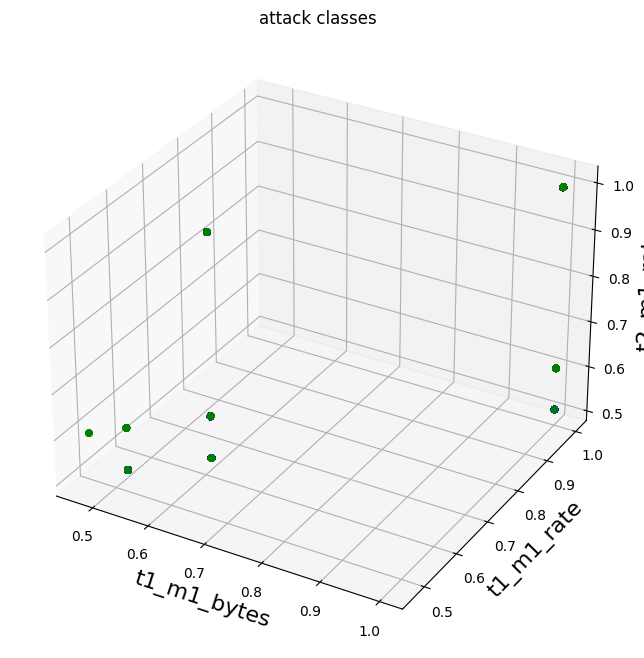

In [94]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

In [95]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [97]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

def classwise_balanced_accuracy(y_test, pred_target, num_classes):
    class_balanced_accuracy = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        
        balanced_accuracy = (sensitivity + specificity) / 2
        class_balanced_accuracy[cls] = balanced_accuracy
    
    return class_balanced_accuracy

In [98]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 6]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 6]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 6]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'TW (common features except t_features with smetrics)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           6]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'TW (common features except t_features with smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           6]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'TW (common features except t_features with smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           6]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           3,
                                           'TW (common features except t_features with smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           6]
        
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [99]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [100]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 15:01:56.648341
{0: 0.9685552959501558, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.9793102553119686}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision    Recall     TNR       TPR  Accuracy  F1_score  \
0  KNeighbors   0.997717  0.997734  0.9375  0.999611  0.997734  0.997706   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.987421  0.974262  0.002266 0 days 00:00:00.007163   

               pred_time  
0 0 days 00:00:00.982166  
Evaluating: DecisionTree
2024-02-19 15:01:57.888902
{0: 0.995508826583593, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.9969378572139368}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR       

In [101]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.997717  0.997734  0.937500  0.999611  0.997734  0.997706   
1  DecisionTree   0.999127  0.999119  0.991667  0.999351  0.999119  0.999121   
2  RandomForest   0.960016  0.959089  0.063401  1.000000  0.959089  0.942141   
3       Bagging   0.999249  0.999245  0.991667  0.999481  0.999245  0.999246   
4           XGB   0.998995  0.998993  0.983402  0.999481  0.998993  0.998994   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.987421  0.974262  0.002266 0 days 00:00:00.007163   
1           0.998201  0.990138  0.000881 0 days 00:00:00.089772   
2           0.431296  0.330226  0.040911 0 days 00:00:01.144336   
3           0.998228  0.991532  0.000755 0 days 00:00:00.752466   
4           0.995543  0.988675  0.001007 0 days 00:00:04.594082   

               pred_time  
0 0 days 00:00:00.982166  
1 0 days 00:00:00.004379  
2 0 days 00:00:00.067773  
3 0 days

In [102]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [103]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [104]:
counts = df_topredict['attack'].value_counts()

print(counts)

map_dict_1 = {
    'Normal': 0,
    'OS_Fingerprint': 1,
    'UDP': 2,
    'Keylogging': 3,
    'Service_Scan': 4,
    'Data_Exfiltration': 5  
}

# Swap the keys and values in the map_dict
reverse_map_dict = {v: k for k, v in map_dict.items()}

# Map the numeric labels to their string labels
mapped_labels = {reverse_map_dict[key]: value for key, value in counts.items()}

print(mapped_labels)

attack
4    25223
0      827
1      376
3       37
2       16
Name: count, dtype: int64
{'Service_Scan': 25223, 'Normal': 827, 'OS_Fingerprint': 376, 'Keylogging': 37, 'UDP': 16}


In [105]:
plot_confusion_matrixes("eval/output_numeric_only_report")

     Classifier                                   Confusion_Matrix  \
0    KNeighbors  [[ 225    0    0    0   15]\n [   0  108    0 ...   
1  DecisionTree  [[ 238    0    0    0    2]\n [   0  108    0 ...   
2  RandomForest  [[  22    0    0    0  218]\n [   0    7    0 ...   
3       Bagging  [[ 238    0    0    0    2]\n [   0  108    0 ...   
4           XGB  [[ 237    0    0    0    3]\n [   0  107    0 ...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 6: Timewindowing with default features and without spectral metrics
</div>


In [106]:
X_train_xmetrics = X_train[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate']]
X_test_xmetrics = X_test[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate']]
# X_train = X_train.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
# X_test = X_test.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
X_train = X_train[['pkts', 'bytes', 'rate']]
X_test = X_test[['pkts', 'bytes', 'rate']]

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_topredict.columns.tolist()[x]
    y_feature = df_topredict.columns.tolist()[y]
    z_feature = df_topredict.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_topredict_without_smetric[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict_without_smetric[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict_without_smetric[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict_without_smetric['attack'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

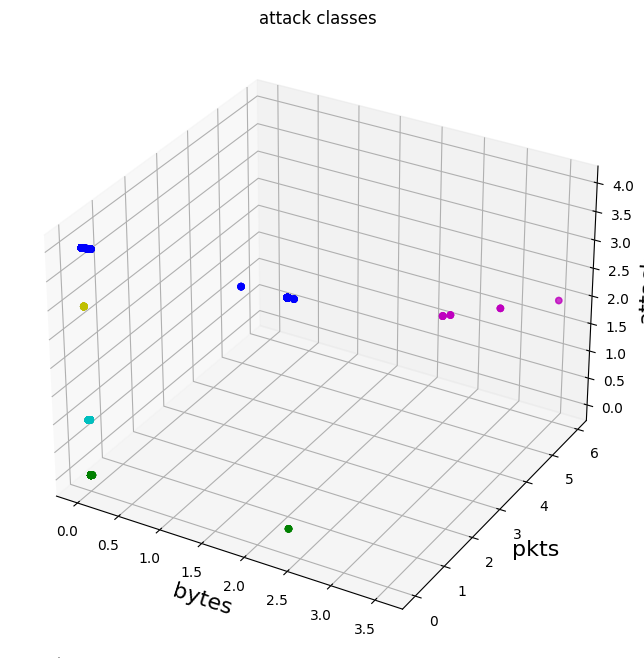

In [108]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

In [109]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(report.get('2')['f1-score'])
print(report)
# Extract and print F1-score for each class
for label, metrics in report.items():
    if label.isdigit():  # Check if the key is a digit (class label)
        print(f"F1-score for class {label} 'f1-score': {metrics['f1-score']}")


1.0
{'0': {'precision': 0.9913419913419913, 'recall': 0.9541666666666667, 'f1-score': 0.9723991507430998, 'support': 240}, '1': {'precision': 1.0, 'recall': 0.9907407407407407, 'f1-score': 0.9953488372093023, 'support': 108}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, '4': {'precision': 0.9984185556141276, 'recall': 0.9997360781208762, 'f1-score': 0.9990768825003297, 'support': 7578}, 'accuracy': 0.9982376636455186, 'macro avg': {'precision': 0.9979521093912238, 'recall': 0.9889286971056567, 'f1-score': 0.9933649740905464, 'support': 7944}, 'weighted avg': {'precision': 0.9982298454639901, 'recall': 0.9982376636455186, 'f1-score': 0.9982223169919998, 'support': 7944}}
F1-score for class 0 'f1-score': 0.9723991507430998
F1-score for class 1 'f1-score': 0.9953488372093023
F1-score for class 2 'f1-score': 1.0
F1-score for class 3 'f1-score': 1.0
F1-score for class 4 'f1-score': 0.9990768825

In [110]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [112]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 4]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 4]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 4]
   
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'TW (common features except t_features)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           4]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'TW (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           4]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'TW (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           4]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           3,
                                           'TW (common features except t_features)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           4]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [113]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [114]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 15:02:14.139061
{0: 0.9511098130841121, 1: 0.962962962962963, 2: 1.0, 3: 1.0, 4: 0.9595247675540499}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  KNeighbors   0.994404  0.994461  0.882114  0.998051  0.994461  0.994404   

   Balanced_accuracy      MCC     Error               fit_time  \
0           0.965675  0.93662  0.005539 0 days 00:00:00.032619   

               pred_time  
0 0 days 00:00:00.588972  
Evaluating: DecisionTree
2024-02-19 15:02:15.010697
{0: 0.9831386292834892, 1: 0.9814814814814814, 2: 1.0, 3: 1.0, 4: 0.9834086159677063}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Prec

In [115]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.994404  0.994461  0.882114  0.998051  0.994461  0.994404   
1  DecisionTree   0.998106  0.998112  0.950820  0.999610  0.998112  0.998100   
2  RandomForest   0.940533  0.954305  0.008197  1.000000  0.954305  0.932360   
3       Bagging   0.998357  0.998364  0.958678  0.999610  0.998364  0.998355   
4           XGB   0.998230  0.998238  0.950207  0.999740  0.998238  0.998222   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.965675  0.936620  0.005539 0 days 00:00:00.032619   
1           0.985847  0.978592  0.001888 0 days 00:00:00.034152   
2           0.202500  0.088663  0.045695 0 days 00:00:00.880287   
3           0.989550  0.981475  0.001636 0 days 00:00:00.267541   
4           0.988929  0.980021  0.001762 0 days 00:00:02.123605   

               pred_time  
0 0 days 00:00:00.588972  
1 0 days 00:00:00.002755  
2 0 days 00:00:00.070973  
3 0 days

In [116]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [117]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
plot_confusion_matrixes("eval/output_numeric_only_report")

     Classifier                                   Confusion_Matrix  \
0    KNeighbors  [[ 217    0    0    0   23]\n [   2  100    0 ...   
1  DecisionTree  [[ 232    0    0    0    8]\n [   0  104    0 ...   
2  RandomForest  [[   3    0    0    0  237]\n [   0    0    0 ...   
3       Bagging  [[ 232    0    0    0    8]\n [   0  106    0 ...   
4           XGB  [[ 229    0    0    0   11]\n [   0  107    0 ...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 7: Timewindowing with only spectral metrics
</div>


In [118]:
X_train = X_train_xmetrics
X_test = X_test_xmetrics

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    print(x, y, z)
    x_feature = df_topredict_with_only_smetric.columns.tolist()[x]
    y_feature = df_topredict_with_only_smetric.columns.tolist()[y]
    z_feature = df_topredict_with_only_smetric.columns.tolist()[z]

    plot_data= pd.DataFrame()
    print(df_topredict_with_only_smetric)
    print(df_topredict_with_only_smetric[x_feature])
    plot_data.insert(0,x_feature,df_topredict_with_only_smetric[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict_with_only_smetric[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict_with_only_smetric[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict_without_smetric['attack'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

15 17 21
       t1_m1_pkts    t1_m2_pkts    t1_m3_pkts  t1_m4_pkts  t2_m1_pkts  \
0             1.0  4.457939e+00  11355.960580           9         1.0   
1             1.0  4.457939e+00  11355.960580           9         1.0   
2             1.0  4.419456e+00  11443.502867           9         1.0   
3             1.0  4.552691e+00  12110.843551           8         1.0   
4             1.0  4.552691e+00  12110.843551           8         1.0   
...           ...           ...           ...         ...         ...   
26474         1.0  1.202603e+06     42.000000           0         1.0   
26475         1.0  1.202603e+06     42.000000           0         1.0   
26476         1.0  1.202603e+06     42.000000           0         1.0   
26477         1.0  1.627538e+05     36.000000           0         1.0   
26478         1.0  1.627538e+05     36.000000           0         1.0   

         t2_m2_pkts    t2_m3_pkts  t2_m4_pkts  t1_m1_bytes   t1_m2_bytes  ...  \
0      4.457939e+00  11355.960580

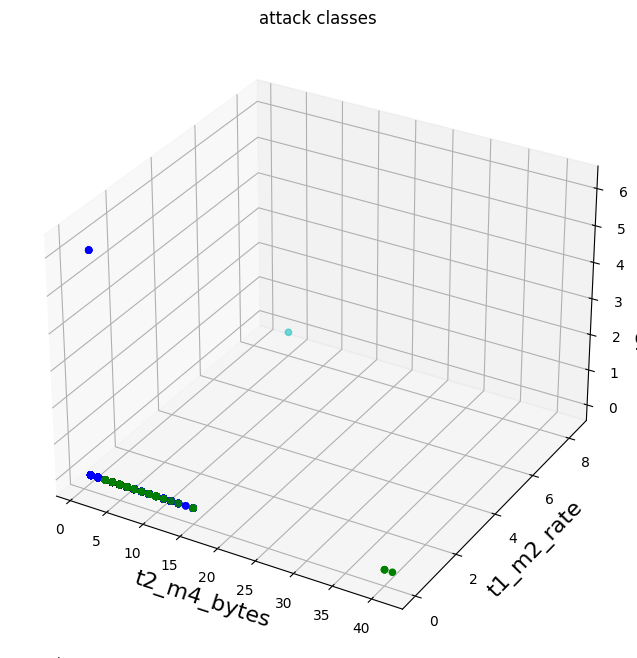

In [120]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

In [121]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(report.get('2')['f1-score'])
print(report)
# Extract and print F1-score for each class
for label, metrics in report.items():
    if label.isdigit():  # Check if the key is a digit (class label)
        print(f"F1-score for class {label} 'f1-score': {metrics['f1-score']}")


1.0
{'0': {'precision': 0.9621848739495799, 'recall': 0.9541666666666667, 'f1-score': 0.9581589958158996, 'support': 240}, '1': {'precision': 1.0, 'recall': 0.9814814814814815, 'f1-score': 0.9906542056074767, 'support': 108}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, '4': {'precision': 0.9982854128198364, 'recall': 0.998812351543943, 'f1-score': 0.9985488126649076, 'support': 7578}, 'accuracy': 0.9972306143001007, 'macro avg': {'precision': 0.9920940573538832, 'recall': 0.9868920999384183, 'f1-score': 0.9894724028176567, 'support': 7944}, 'weighted avg': {'precision': 0.9972219572125653, 'recall': 0.9972306143001007, 'f1-score': 0.9972245362004144, 'support': 7944}}
F1-score for class 0 'f1-score': 0.9581589958158996
F1-score for class 1 'f1-score': 0.9906542056074767
F1-score for class 2 'f1-score': 1.0
F1-score for class 3 'f1-score': 1.0
F1-score for class 4 'f1-score': 0.99854881266

In [122]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [124]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 5]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 5]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 5]
   
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           2,
                                           'TW (smetrics)',
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           5]
    df_scores.loc[len(df_scores.index)] = ['ScanService',
                                           4,
                                           'TW (smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           5]
    df_scores.loc[len(df_scores.index)] = ['OS Fingerprint',
                                           1,
                                           'TW (smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           5]
    df_scores.loc[len(df_scores.index)] = ['Keylogging',
                                           1,
                                           'TW (smetrics)',
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           5]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [125]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [126]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: KNeighbors
2024-02-19 15:02:29.722165
{0: 0.9474623572170302, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.9653851312470525}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
   Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  KNeighbors   0.995908  0.995972  0.895833  0.999091  0.995972  0.995896   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.978982  0.953943  0.004028 0 days 00:00:00.006823   

               pred_time  
0 0 days 00:00:00.972947  
Evaluating: DecisionTree
2024-02-19 15:02:30.962712
{0: 0.9743509865005192, 1: 0.9907407407407407, 2: 1.0, 3: 1.0, 4: 0.9802145122420812}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Rec

In [127]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0    KNeighbors   0.995908  0.995972  0.895833  0.999091  0.995972  0.995896   
1  DecisionTree   0.996969  0.996979  0.942149  0.998702  0.996979  0.996972   
2  RandomForest   0.944111  0.956571  0.025424  1.000000  0.956571  0.936391   
3       Bagging   0.997222  0.997231  0.946281  0.998831  0.997231  0.997225   
4           XGB   0.997222  0.997231  0.946281  0.998831  0.997231  0.997225   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.978982  0.953943  0.004028 0 days 00:00:00.006823   
1           0.986032  0.965860  0.003021 0 days 00:00:00.079519   
2           0.407500  0.236749  0.043429 0 days 00:00:00.979085   
3           0.986892  0.968706  0.002769 0 days 00:00:00.599672   
4           0.986892  0.968706  0.002769 0 days 00:00:04.209267   

               pred_time  
0 0 days 00:00:00.972947  
1 0 days 00:00:00.004155  
2 0 days 00:00:00.071934  
3 0 days

In [128]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [129]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
plot_confusion_matrixes("eval/output_numeric_only_report")

     Classifier                                   Confusion_Matrix  \
0    KNeighbors  [[ 215    0    0    0   25]\n [   0  108    0 ...   
1  DecisionTree  [[ 228    0    0    0   12]\n [   0  106    0 ...   
2  RandomForest  [[   9    0    0    1  230]\n [   0    0    0 ...   
3       Bagging  [[ 229    0    0    0   11]\n [   0  106    0 ...   
4           XGB  [[ 229    0    0    0   11]\n [   0  106    0 ...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  


In [130]:
df_scores = df_scores.sort_values(by='order')
print(df_scores)

       attack_type  attack_label  \
0             DDoS             2   
19  OS Fingerprint             1   
18     ScanService             4   
17      Keylogging             3   
16            DDoS             2   
..             ...           ...   
63      Keylogging             3   
62  OS Fingerprint             1   
61     ScanService             4   
79      Keylogging             3   
78  OS Fingerprint             1   

                                        approach_name            classifier  \
0                             OD (numerical features)  KNeighborsClassifier   
19                            OD (numerical features)         XGBClassifier   
18                            OD (numerical features)         XGBClassifier   
17                            OD (numerical features)         XGBClassifier   
16                            OD (numerical features)         XGBClassifier   
..                                                ...                   ...   
63  TW (common

In [131]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "DDoS"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "DDoS"')[df_scores_filtered.query('attack_type == "DDoS"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['f1_score'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='F1 Score by Approach and Classifier for (DDoS)',
                  xaxis_title='Approach',
                  yaxis_title='F1 Score')

# Show the plot
fig.show()



In [132]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "DDoS"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "DDoS"')[df_scores_filtered.query('attack_type == "DDoS"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['balanced_accuracy'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Balanced accuracy by Approach and Classifier for (DDoS)',
                  xaxis_title='Approach',
                  yaxis_title='balanced accuracy Score')

# Show the plot
fig.show()



In [133]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()
# print(df_scores_filtered)
# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "DDoS"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "DDoS"')[df_scores_filtered.query('attack_type == "DDoS"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['MCC'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='MCC by Approach and Classifier for (DDoS)',
                  xaxis_title='Approach',
                  yaxis_title='MCC Score')

# Show the plot
fig.show()



In [134]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()
# print(df_scores_filtered)
# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "DDoS"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "DDoS"')[df_scores_filtered.query('attack_type == "DDoS"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Precision'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Precision by Approach and Classifier for (DDoS)',
                  xaxis_title='Approach',
                  yaxis_title='Precision Score')

# Show the plot
fig.show()



In [135]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()
# print(df_scores_filtered)
# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "DDoS"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "DDoS"')[df_scores_filtered.query('attack_type == "DDoS"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Recall'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Recall by Approach and Classifier for (DDoS)',
                  xaxis_title='Approach',
                  yaxis_title='Recall Score')

# Show the plot
fig.show()



In [136]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "ScanService"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "ScanService"')[df_scores_filtered.query('attack_type == "ScanService"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['f1_score'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='F1 Score by Approach and Classifier for (ScanService)',
                  xaxis_title='Approach',
                  yaxis_title='F1 Score')

# Show the plot
fig.show()



In [137]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "ScanService"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "ScanService"')[df_scores_filtered.query('attack_type == "ScanService"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['balanced_accuracy'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Balanced accuracy Score by Approach and Classifier for (ScanService)',
                  xaxis_title='Approach',
                  yaxis_title='Balanced accuracy Score')

# Show the plot
fig.show()



In [138]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "ScanService"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "ScanService"')[df_scores_filtered.query('attack_type == "ScanService"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['MCC'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='MCC Score by Approach and Classifier for (ScanService)',
                  xaxis_title='Approach',
                  yaxis_title='MCC Score')

# Show the plot
fig.show()



In [139]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "ScanService"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "ScanService"')[df_scores_filtered.query('attack_type == "ScanService"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Precision'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Precision Score by Approach and Classifier for (ScanService)',
                  xaxis_title='Approach',
                  yaxis_title='Precision Score')

# Show the plot
fig.show()



In [140]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "ScanService"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "ScanService"')[df_scores_filtered.query('attack_type == "ScanService"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Recall'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Recall Score by Approach and Classifier for (ScanService)',
                  xaxis_title='Approach',
                  yaxis_title='Recall Score')

# Show the plot
fig.show()



In [141]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "OS Fingerprint"')[df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['f1_score'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='F1 Score by Approach and Classifier for (OS Fingerprint)',
                  xaxis_title='Approach',
                  yaxis_title='F1 Score')

# Show the plot
fig.show()



In [142]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "OS Fingerprint"')[df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['balanced_accuracy'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Balanced accuracy Score by Approach and Classifier for (OS Fingerprint)',
                  xaxis_title='Approach',
                  yaxis_title='Balanced accuracy Score')

# Show the plot
fig.show()



In [143]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "OS Fingerprint"')[df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['MCC'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='MCC Score by Approach and Classifier for (OS Fingerprint)',
                  xaxis_title='Approach',
                  yaxis_title='MCC Score')

# Show the plot
fig.show()



In [144]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "OS Fingerprint"')[df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Precision'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Precision Score by Approach and Classifier for (OS Fingerprint)',
                  xaxis_title='Approach',
                  yaxis_title='Precision Score')

# Show the plot
fig.show()



In [145]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "OS Fingerprint"')[df_scores_filtered.query('attack_type == "OS Fingerprint"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Recall'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Recall Score by Approach and Classifier for (OS Fingerprint)',
                  xaxis_title='Approach',
                  yaxis_title='Recall Score')

# Show the plot
fig.show()



In [146]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()
# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "Keylogging"')['classifier'].unique():
    
    subset = df_scores_filtered.query('attack_type == "Keylogging"')[df_scores_filtered.query('attack_type == "Keylogging"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['f1_score'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='F1 Score by Approach and Classifier for (Keylogging)',
                  xaxis_title='Approach',
                  yaxis_title='F1 Score')

# Show the plot
fig.show()



In [147]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "Keylogging"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "Keylogging"')[df_scores_filtered.query('attack_type == "Keylogging"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['balanced_accuracy'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Balanced accuracy Score by Approach and Classifier for (Keylogging)',
                  xaxis_title='Approach',
                  yaxis_title='Balanced accuracy Score')

# Show the plot
fig.show()



In [148]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "Keylogging"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "Keylogging"')[df_scores_filtered.query('attack_type == "Keylogging"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['MCC'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='MCC Score by Approach and Classifier for (Keylogging)',
                  xaxis_title='Approach',
                  yaxis_title='MCC Score')

# Show the plot
fig.show()



In [149]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "Keylogging"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "Keylogging"')[df_scores_filtered.query('attack_type == "Keylogging"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Precision'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Precision Score by Approach and Classifier for (Keylogging)',
                  xaxis_title='Approach',
                  yaxis_title='Precision Score')

# Show the plot
fig.show()



In [150]:
import plotly.graph_objects as go
df_scores_filtered = df_scores[df_scores['approach_name'] != 'OD (numerical features)']
# Initialize the figure
fig = go.Figure()

# Loop through each classifier to create a separate line for each
for classifier in df_scores_filtered.query('attack_type == "Keylogging"')['classifier'].unique():
    subset = df_scores_filtered.query('attack_type == "Keylogging"')[df_scores_filtered.query('attack_type == "Keylogging"')['classifier'] == classifier]
    fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset['Recall'], mode='lines+markers', name=classifier))

# Add title and labels
fig.update_layout(title='Recall Score by Approach and Classifier for (Keylogging)',
                  xaxis_title='Approach',
                  yaxis_title='Recall Score')

# Show the plot
fig.show()

